# Heirarchial Clustering

The hierarchical clustering Technique is one of the popular Clustering techniques in Machine Learning. Before we try to understand the concept of the Hierarchical clustering Technique let us understand the Clustering.

Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:
* Agglomerative
* Divisive

### Agglomerative Heirarchial Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

* Compute the proximity matrix
* Let each data point be a cluster
* Repeat: Merge the two closest clusters and update the proximity matrix
* Until only a single cluster remains

Key operation is the computation of the proximity of two clusters

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

* Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

![](pic1.png)

* Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.

* Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.

* Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.

* Step- 5: Finally, all the clusters are merged together and form a single cluster.

A heirarchial clustering can be visualised using a Dendogram.

A Dendrogram is a tree-like diagram that records the sequences of merges or splits.

![](pic2.jpeg)
![](pic3.jpeg)

### Divisive Heirarchial Clustering

Since the Divisive Hierarchical clustering Technique is not much used in the real world, I’ll give a brief of the Divisive Hierarchical clustering Technique.

In simple words, we can say that the Divisive Hierarchical clustering is exactly the opposite of the Agglomerative Hierarchical clustering. In Divisive Hierarchical clustering, we consider all the data points as a single cluster and in each iteration, we separate the data points from the cluster which are not similar. Each data point which is separated is considered as an individual cluster. In the end, we’ll be left with n clusters.

As we’re dividing the single clusters into n clusters, it is named as Divisive Hierarchical clustering.

### HOW TO CALCULATE SIMILARITY BETWEEN CLUSTERS?

Calculating the similarity between two clusters is important to merge or divide the clusters. There are certain approaches which are used to calculate the similarity between two clusters:

* MIN
* MAX
* Group Average

###### MIN: 
Also known as single linkage algorithm can be defined as the similarity of two clusters C1 and C2 is equal to the minimum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2.

Mathematically this can be written as,

Sim(C1,C2) = Min Sim(Pi,Pj) such that Pi ∈ C1 & Pj ∈ C2

In simple words, pick the two closest points such that one point lies in cluster one and the other point lies in cluster 2 and take their similarity and declare it as the similarity between two clusters.

![](pic5.jpeg)

Pros of MIN:
This approach can separate non-elliptical shapes as long as the gap between two clusters is not small.
![](pic9.jpeg) ![](pic10.jpeg)

Cons of MIN:
MIN approach cannot separate clusters properly if there is noise between clusters.
![](pic11.jpeg)![](pic12.jpeg)

###### MAX

Also known as the complete linkage algorithm, this is exactly opposite to the MIN approach. The similarity of two clusters C1 and C2 is equal to the maximum of the similarity between points Pi and Pj such that Pi belongs to C1 and Pj belongs to C2.

Mathematically this can be written as,

Sim(C1,C2) = Max Sim(Pi,Pj) such that Pi ∈ C1 & Pj ∈ C2

In simple words, pick the two farthest points such that one point lies in cluster one and the other point lies in cluster 2 and take their similarity and declare it as the similarity between two clusters.
![](pic13.jpeg)

Pros of MAX:
MAX approach does well in separating clusters if there is noise between clusters.
![](pic14.jpeg)
![](pic15.jpeg)

Cons of Max:
* Max approach is biased towards globular clusters.
* Max approach tends to break large clusters.
![](pic16.jpeg)
![](pic17.jpeg)

###### GROUP AVERAGE

Take all the pairs of points and compute their similarities and calculate the average of the similarities.

Mathematically this can be written as,

sim(C1,C2) = ∑ sim(Pi, Pj)/|C1|*|C2|

where, Pi ∈ C1 & Pj ∈ C2

![](pic18.jpeg)

Pros of Group Average:

* The group Average approach does well in separating clusters if there is noise between clusters.

Cons of Group Average:

* The group Average approach is biased towards globular clusters.


### Sklearn Implementation on Credit Card Dataset: Source Kaggle

##### !!Before going through the code please do go through the data set!! 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import scipy.cluster.hierarchy as shc

X = pd.read_csv('CC_GENERAL.csv') 
  
# Dropping the CUST_ID column from the data 
X = X.drop('CUST_ID', axis = 1) 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 

# Scaling the data so that all the features become comparable 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that the data approximately  
# follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

#Reducing the dimensionality of the data
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2']

#Visualising the working of dendograms
plt.figure(figsize =(8, 8)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

To determine the optimal number of clusters by visualizing the data, imagine all the horizontal lines as being completely horizontal and then after ca
lculating the maximum distance between any two horizontal lines, draw a horizontal line in the maximum distance calculated.

Now, Building and Visualizing the different clustering models for different values of k:

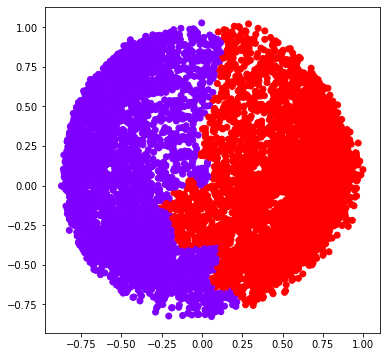

In [9]:
#A)k=2
k=2
ac2 = AgglomerativeClustering(n_clusters = k) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = ac2.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

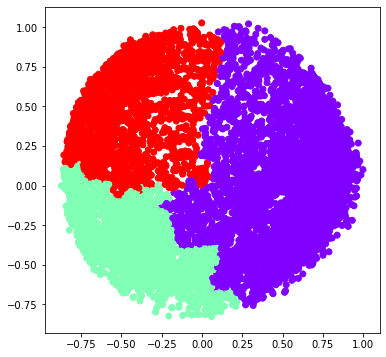

In [10]:
#B)k=3

k=3
ac3 = AgglomerativeClustering(n_clusters = k) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

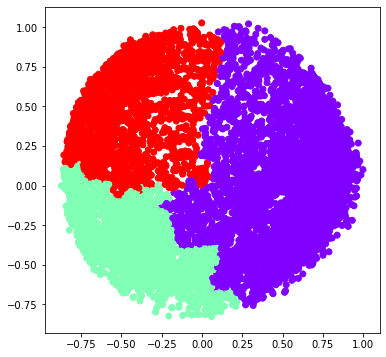

In [13]:
#C)k=3

k=3
ac3 = AgglomerativeClustering(n_clusters = k) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

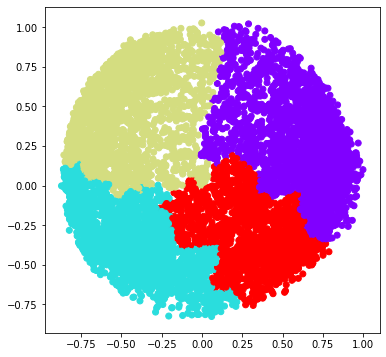

In [14]:
#D)k=4

k=4
ac4 = AgglomerativeClustering(n_clusters = k) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

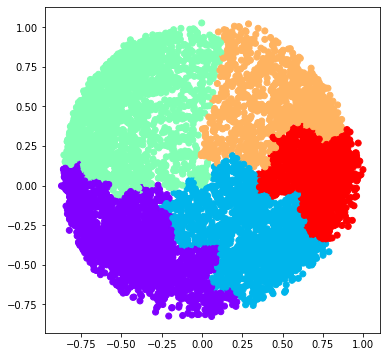

In [15]:
#E)k=5

k=5
ac5 = AgglomerativeClustering(n_clusters = k) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac5.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

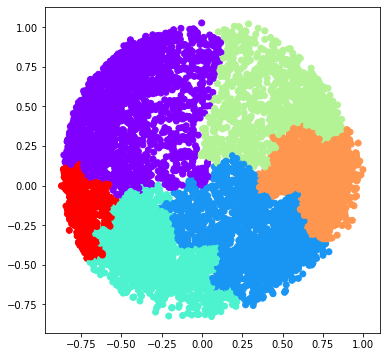

In [17]:
#F)k=6

k=6
ac6 = AgglomerativeClustering(n_clusters = k) 
  
plt.figure(figsize =(6, 6)) 
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac6.fit_predict(X_principal), cmap ='rainbow') 
plt.show()

##### Now we now determine the optimal number of clusters using a mathematical technique. Here, We will use the Silhouette Scores for the purpose.

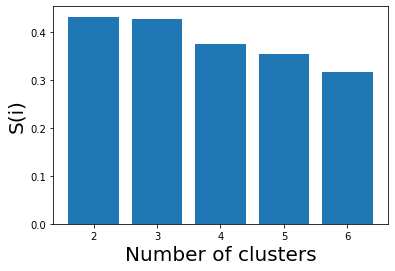

In [18]:
#Evaluating the different models and Visualizing the results.
k = [2, 3, 4, 5, 6] 
  
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(X_principal, ac2.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac3.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac4.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac5.fit_predict(X_principal))) 
silhouette_scores.append( 
        silhouette_score(X_principal, ac6.fit_predict(X_principal))) 
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show()

Thus, with the help of the silhouette scores, it is concluded that the optimal number of clusters for the given data and clustering technique is 2